This part of the assignment deals with discrete Fourier transform as well as python programming.

A fan is rotating with a constant angular velocity. You are measuring the angle of the fan, with respect to time. To capture this signal reliably, you have to choose your sampling rate carefully.
Otherwise, you may see aliasing: https://www.youtube.com/watch?v=R-IVw8OKjvQ

### Instructions:
- Please rename this file with Your Roll No.
- Only edit at "### WRITE YOUR CODE HERE"
- Evaluation will be done by calling all functions from a test script, so make sure they compile correctly
- Render (Kernel > Restart & Run All) before submitting, so that we can see your graphs here

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## GENERATE SAMPLES : 3+5 MARKS

In [2]:
def generate_x(omega, t, x0=0):
    '''
    Inputs:
        omega: scalar float, the angular velocity in radians/s
        t: scalar float, time in s
        x0: scalar float, initial angle at t=0 in radians, default x0=0
    Outputs:
        x: scalar float, angle at t=t in radians, between [0, 2 pi)
    '''
    ### BEGIN - 3 MARKS
    x = (x0 + omega*t)%(2*np.pi)
    ### END
    return x

In [3]:
# This is how you can test if your code is working fine
def test_generate_x():
    x = generate_x(2*np.pi, 2)
    assert x==0                # assert that your method returns the correct answer.
                               # If not, this statement will give an assertion error.
    print('Test passed', '\U0001F44D')
    
# Please do not call any function without using "if __name__=="__main__":" statement. 
# Otherwise, it will be difficult for the TAs to compile
if __name__=="__main__":
    test_generate_x()

Test passed 👍


In [4]:
def sample_x(omega, Fs, tfinal):
    '''
    Inputs:
        omega: scalar float, the angular velocity in radians/s
        Fs: (float) sampling rate in Hz
        tfinal: (float) final time in s
    Output:
        xs: (np array, 1D float) samples of x from t=0 to t=tfinal
        ts: (np array, 1D float) samples of t from t=0 to t=tfinal, sampled uniformly
    '''
    ### BEGIN - 5 MARKS
    Ts = 1/Fs
    ts = np.arange(0,tfinal,Ts)
    xs = np.array([generate_x(omega, t) for t in ts])
    ### END
    return xs, ts

In [5]:
def test_sample_x():
    xs,ts = sample_x(2*np.pi, 2, 2)
    assert np.all( np.isclose(xs, np.array([0., np.pi, 0., np.pi]), atol=0.001) )
    assert np.all(np.isclose(ts, np.array([0. , 0.5, 1. , 1.5]), atol=0.001) )
    print('Test passed', '\U0001F44D')

if __name__=="__main__":
    test_sample_x()

Test passed 👍


### Plot Samples

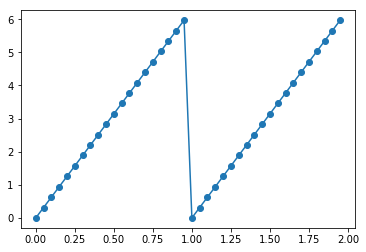

In [6]:
def plot_xs(xs,ts):
    plt.plot(ts, xs, 'o-')

if __name__=="__main__":
    xs,ts = sample_x(2*np.pi, 20, 2)
    plot_xs(xs,ts)
    plt.show()

# DFT OF TIME SERIES : 5 MARKS

In [7]:
def dft_xs(xs, ts, Nfft):
    '''
    Inputs:
        xs, ts: defined above. Note that ts are uniformly sampled
        Nfft: (float) window size for DFT. It may be smaller or larger than len(xs)
    Outputs:
        Xs: (np array of shape (Nfft,)) magnitude dft of xs
        fs: (np array of shape (Nfft,)) frequency value (in Hz) of corresponding index of Xs
    '''
    ### BEGIN - 5 MARKS
    Xs = np.fft.fft(xs, n=Nfft)
    Xs = np.abs(Xs)
    fs = np.arange(0,Nfft)*1/(ts[1]-ts[0]) * 1/Nfft
    ### END
    return Xs, fs

In [8]:
def test_dft_xs():
    xs, ts = sample_x(20*np.pi, 10, 5)
    Nfft = 5
    Xs, fs = dft_xs(xs, ts, Nfft=Nfft)
    assert Xs.shape==(Nfft,) or Xs.shape==(Nfft,1)
    assert fs.shape==(Nfft,) or fs.shape==(Nfft,1)
    print('Test passed', '\U0001F44D')
if __name__=="__main__":
    test_dft_xs()

Test passed 👍


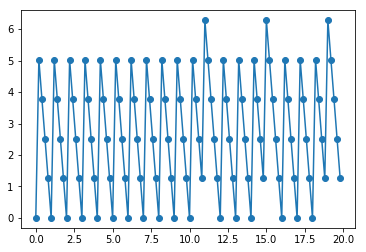

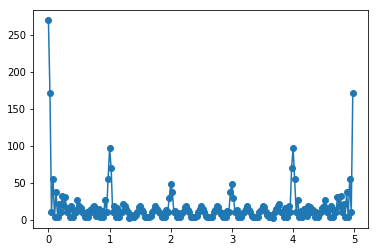

In [9]:
def plot_Xs(Xs,fs):
    plt.plot(fs,Xs,'o-')
    plt.show()
    
if __name__=="__main__":
    xs,ts=sample_x(2*np.pi*4, 5, 20)
    plot_xs(xs,ts)
    plt.figure()
    Xs,fs = dft_xs(xs,ts, 200)
    plot_Xs(Xs,fs)

# BONUS QUESTION : 5+2 MARKS
## The effect of changing sampling frequency
Use the above functions to:
1. Generate xs with omega = $20\pi$ for tfinal=5s. Sample with a range of frequencies from 5 to 35, Fs=np.arange(5,35,2.5)
2. For each Fs, compute Xs, and plot it as Xs vs f with proper axes labels. Fix the xlim to be 0 to 50Hz on all the plots.

Help: To avoid seeing unnecessary peaks at f=0, normalize xs to have zero mean.

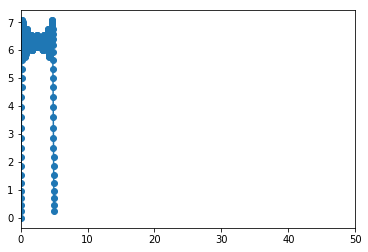

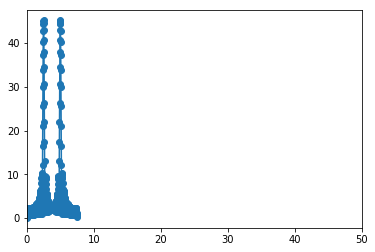

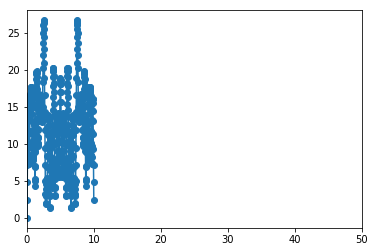

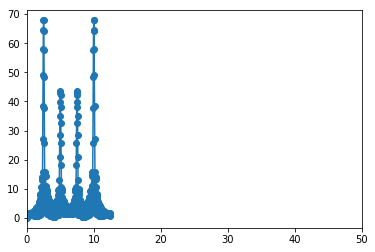

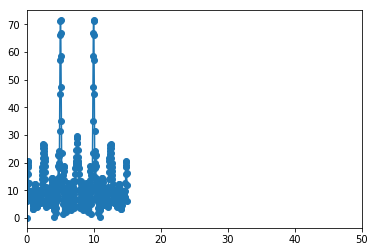

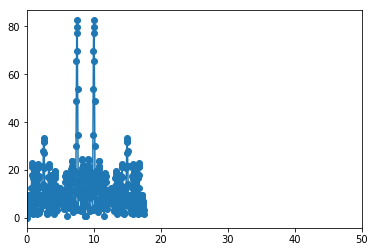

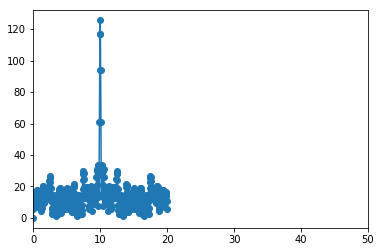

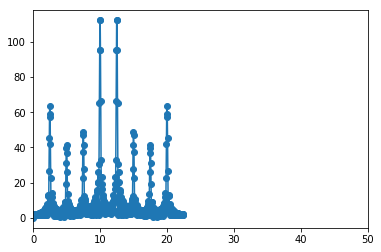

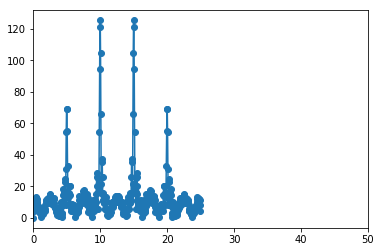

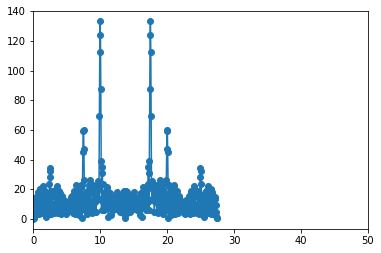

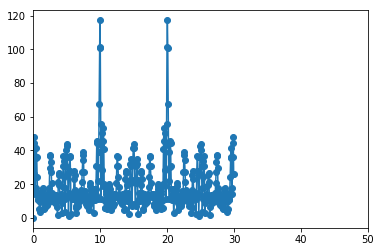

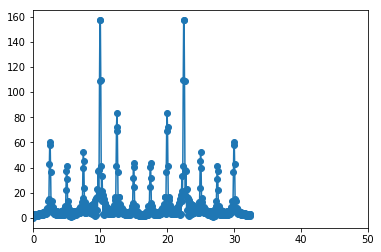

In [10]:
def changingFs():
    ### BEGIN - 5 MARKS
    for Fs in np.arange(5,35,2.5):
        xs, ts = sample_x(20*np.pi, Fs, 5)
        Xs, fs = dft_xs(xs-np.sum(xs)/len(xs), ts, Nfft=512)
        plt.xlim(0,50)
        plot_Xs(Xs, fs)
    ### END
    return

if __name__=="__main__":
    changingFs()


## Observations
What do you see above? Aliasing?

1. What happens when Fs < 10Hz?
2. What happens when 10Hz < Fs < 20 Hz?
3. What happens when Fs > 20 Hz?

Write your observations below as text:

(2 marks) (double-click to edit)
1. Peaks appear in |X[k]| when k/Nfft matches x[n]'s frequency. This is due to aliasing.
2. Peak appears at 10Hz, which lies in the right half of the spectrum. A corresponding peak appears in the left half of the spectrum because of even and periodic nature of |X[k]|.
3. Peak appears at 10Hz, which lies in the left half of the spectrum. A corresponding peak appears in the right half of the spectrum because of even and periodic nature of |X[k]|.

Generally, we look at half the spectrum only to find the signal's fundamental frequency, i.e., in k$\in$(0,Nfft/2).
In the above cases, we can find out the true frequency from |X[k]| only in the 3rd case.